In [30]:
import scipy.io
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.spatial import distance
from geopy.distance import geodesic
import geopy.point as point
from tools import *
from pylab import *

## Location of environment

In [2]:
def creat_map_configs(corner, x, y):
    east = geodesic(x).destination(corner, 0)
    north = geodesic(y).destination(corner, 90)
    return corner[0], east.latitude, corner[1], north.longitude

In [3]:
# London map configs
london_corner = [51.5108, -0.0988]
london_config = creat_map_configs(london_corner, 1, 1)

# Paris map configs
paris_corner = [48.8296, 2.3132] # paris 14e
paris_config = creat_map_configs(paris_corner, 1, 1)

# Toulouse map configs
toulouse_corner = [43.6048, 1.4393]
toulouse_config = creat_map_configs(toulouse_corner, 1, 1)

# Data preparation

In [13]:
meta_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'paris_square_20_cell'])

In [12]:
location = 'paris_square_20'
base = f'./dataset/data_with_building/{location}_cell.mat'
tx_grid = 20
meta_data = scipy.io.loadmat(f'./dataset/{location}_cell.mat')
cir_profile = meta_data[f'{location}_cell']['cir'][0][0]
dist = meta_data[f'{location}_cell']['dist'][0][0]

Y = meta_data[f'{location}_cell'][0][0]['tx'].T # coordination of agents (lat, lon)
RX = meta_data[f'{location}_cell'][0][0]['rx'].T

In [92]:
meta_data, cir_profile, dist, Y, RX = read_mat(base,location)

In [93]:
Y.shape

(400, 2)

In [6]:
TX = Y.copy()

In [15]:
def plot_agent(Y, ax=None, ind=None, label=None, c=None):
    if not ind:
        ind = np.arange(len(Y))

    if not ax:
        ax = plt

    try:
        ax.scatter(Y[ind, 0], Y[ind, 1], label=label, c=c)
    except:
        ax.scatter(Y[0], Y[1], label=label, c=c)

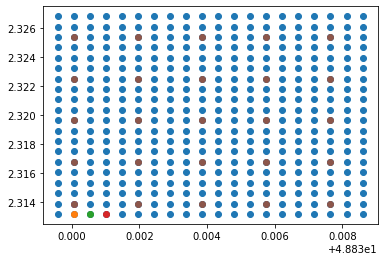

In [16]:
fig, ax = plt.subplots()
plot_agent(Y, ax)
plot_agent(Y, ax, 1)
plot_agent(Y, ax, 2)
plot_agent(Y, ax, 3)
plot_agent(Y, ax, 21)
plot_agent(RX)

In [17]:
geodesic(Y[1, :], Y[2, :]).km, geodesic(Y[1, :], Y[21, :]).km, geodesic(Y[2, :], Y[22, :]).km

(0.05263154420286226, 0.052631082702069516, 0.052630587015089596)

In [18]:
# class Extractor(object):
#     def __init__(self, cir_profile):
        
#         self.cir_profile = cir_profile
#         self.ray_len = []
#         self.delay_set = []
#         self.time_range = []
#         self.theta_lst = []
#         self.sigma_lst = []
#         self.var_profile = []

#     def clean_input(self):
#         T, S = self.cir_profile.shape


#         for chs in self.cir_profile:
#             self.theta_lst.append([np.abs(ch[0, :]) for ch in chs])
#             self.sigma_lst.append([1e-7 * np.mean(np.abs(ch[1, :]))**2 / np.abs(ch[1, :])**2 for  ch in chs])
#             # var_profile.extend(1e-1 / np.abs(ch[1, :])**2 for  ch in chs)

#             for ch in chs:
#                 self.ray_len.append(len(ch[0,:]))
#                 self.delay_set.extend(ch[0, :])
#                 self.time_range.append(max(ch[0, :]))

#         max_reflection = max(self.ray_len)
#         mag = - math.floor(math.log(np.mean(self.delay_set), 10))
#         self.theta_mtx = np.reshape(np.array(self.theta_lst, dtype='object'), newshape=(4,-1)).T
#         self.sigma_mtx = np.reshape(np.array(self.sigma_lst, dtype='object'), newshape=(4,-1)).T
#         return self.theta_mtx, self.sigma_mtx

#     def formatting_X(self):
#         T, S = self.cir_profile.shape
#         self.max_reflection = max(self.ray_len)
#         self.mag = - math.floor(math.log(np.mean(self.delay_set), 10))
#         x_pre = []
#         for j in range(T):
#             cir_t = [] # channel impulse response for a transmitter
#             for i in range(S):
#                 c_tmp = cir_profile[j, i].copy()
#                 c_tmp[0, :] = c_tmp[0, :] * 10 ** self.mag # normalize the delay seconds
                
#                 m, n = c_tmp.shape
#                 if m == 2:
#                     c_tmp[1, :] = abs(c_tmp[1, :])
                    
#                 cir_shaped = np.pad(c_tmp, \
#                     ((0,2-m), (0, self.max_reflection-n)), \
#                         constant_values=0).flatten() # padding 0 to shape of (2, max_len)
#                 cir_t.append(np.array(cir_shaped, dtype='float'))
#                 # cir_t.append(np.array(cir_shaped[0: 2], dtype='float'))

#             x_pre.append(np.array(cir_t).flatten())

#         self.X = np.array(x_pre)

#         return self.X

In [31]:
ext = Extractor(cir_profile)
# theta_mtx, sigma_mtx = ext.clean_input()
X2 = ext.formatting_X()

d:\Telecom_2eme_anne\Geolocation_simulation\Simulation\tools.py:99: ComplexWarning: Casting complex values to real discards the imaginary part
  self.mag = - math.floor(math.log(np.mean(self.delay_set), 10))
d:\Telecom_2eme_anne\Geolocation_simulation\Simulation\tools.py:120: ComplexWarning: Casting complex values to real discards the imaginary part
  cir_t.append(np.array(cir_shaped, dtype='float'))


In [29]:
cir_profile[0][20].shape

(2, 1)

In [20]:
ray_len = []
delay_set = []
time_range = []
theta_lst = []
sigma_lst = []
var_profile = []

for chs in cir_profile:
    theta_lst.append([np.abs(ch[0, :]) for ch in chs])
    sigma_lst.append([1e-7 * np.mean(np.abs(ch[1, :]))**2 / np.abs(ch[1, :])**2 for  ch in chs])
    # var_profile.extend(1e-1 / np.abs(ch[1, :])**2 for  ch in chs)

    for ch in chs:
        ray_len.append(len(ch[0,:]))
        delay_set.extend(ch[0, :])
        time_range.append(max(ch[0, :]))

max_reflection = max(ray_len)
mag = - math.floor(math.log(np.mean(delay_set), 10))

IndexError: index 1 is out of bounds for axis 0 with size 1

In [8]:
theta_mtx = np.reshape(np.array(theta_lst, dtype='object'), newshape=(4,-1)).T
sigma_mtx = np.reshape(np.array(sigma_lst, dtype='object'), newshape=(4,-1)).T

d:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
d:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
d:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


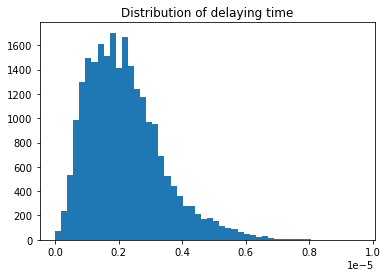

In [32]:
_ = plt.hist(ext.delay_set, bins=50)
_ = plt.title('Distribution of delaying time')

Text(0.5, 0, '#-of-raytraces')

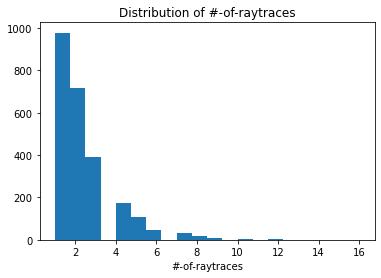

In [33]:
_ = plt.hist(ray_len, bins=20)
plt.title('Distribution of #-of-raytraces')
plt.xlabel('#-of-raytraces')

In [39]:
max(ray_len)

16

In [72]:

len(cir_shaped), cir_shaped

(29,
 array([1.55994676e-04, 4.26153664e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]))

In [94]:
# prepare X

T, S = cir_profile.shape
x_pre = []
for j in range(T):
    cir_t = [] # channel impulse response for a transmitter
    for i in range(S):
        c_tmp = cir_profile[j, i].copy()
        c_tmp[0, :] = c_tmp[0, :] * 10 ** 7 # normalize the delay seconds
        
        m, n = c_tmp.shape
        if m == 2:
            c_tmp[1, :] = abs(c_tmp[1, :])
            
        cir_shaped = np.pad(c_tmp, \
            ((0,2-m), (0, 29-n)), \
                constant_values=0).flatten() # padding 0 to shape of (2, max_len)
        if len(cir_shaped) > 5:
            cir_shaped = cir_shaped[:5]
        cir_t.append(np.array(cir_shaped, dtype='float'))

    x_pre.append(np.array(cir_t).flatten())

X = np.array(x_pre)  

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


d:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


IndexError: index 1 is out of bounds for axis 0 with size 1

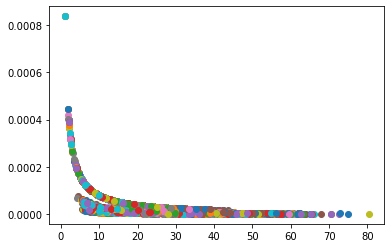

In [103]:
T, S = cir_profile.shape

x_pre = []
for j in range(T):
    cir_t = [] # channel impulse response for a transmitter
    for i in range(S):
        c_tmp = cir_profile[j, i].copy()
        c_tmp[0, :] = c_tmp[0, :] * 10 ** 7 # normalize the delay seconds
        
        m, n = c_tmp.shape
        if m == 2:
            c_tmp[1, :] = abs(c_tmp[1, :])
        plt.scatter(c_tmp[0, :], c_tmp[1, :])

In [13]:
coords = np.repeat(RX.flatten()[:, None], T, axis=1).T

# X = np.concatenate((X, coords), axis=1)

In [58]:
# prepare X with only amplitude feature

T, S = cir_profile.shape
x_pre = []
for j in range(T):
    cir_t = [] # channel impulse response for a transmitter
    for i in range(S):
        c_tmp = cir_profile[j, i].copy()
        # c_tmp[0, :] = c_tmp[0, :] * 10 ** mag # normalize the delay seconds
        
        m, n = c_tmp.shape
        if m <= 1:
            cir_shaped = np.array([0, 0])
        else:
            c_amp = abs(c_tmp[1, :])            
            cir_shaped = np.pad(c_amp, (0, 29-n), constant_values=0)

        cir_t.extend(cir_shaped)
        # print(np.shape(cir_t))

    x_pre.append(np.array(cir_t))

X = np.array(x_pre)

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


# Learning

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_validate
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.pipeline import Pipeline
import seaborn as sns
import lightgbm as lgb

In [96]:
rx_ls = []
for rx in RX:
    rx_ls.extend(np.tile(rx, (100, 1)))

rx_array = np.array(rx_ls)

In [97]:
# X_extend = np.concatenate([X, rx_array],axis=1)

# Y = meta_data[str(location)+'_cell'][0][0]['tx'].T # lat, lon
# Y_lat, Y_lon = Y[:, 0], Y[:, 1]

# Y = dist

# Y[0, :], Y[1, :] = Y[1, :], Y[0, :] # change the order of lat and lon increases the accuracy (lon, lat)
x_train, x_test, y_train, y_test, tx_train, tx_test = train_test_split(X, Y, Y, train_size=.75)
# x_train_trunc, x_test_trunc = x_train[:, trunc_ind], x_test[:, trunc_ind]
# x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=.75)
y_train_lat, y_train_lon, y_test_lat,  y_test_lon = y_train[:, 0], y_train[:, 1], y_test[:, 0], y_test[:, 1]

In [78]:
xgb_pipe = Pipeline([('scale', StandardScaler()), \
    ('xgb', MultiOutputRegressor(xgb.XGBRegressor(n_estimators=500, max_depth=2000, eta=0.1, subsample=1, colsample_bytree=1, reg_lambda=0)))])

lgb_pipe = Pipeline([('scale', StandardScaler()), \
    ('lgb', MultiOutputRegressor(lgb.LGBMRegressor(n_estimators=500, max_depth=2000, eta=0.1, subsample=1, colsample_bytree=1, reg_lambda=0)))])

rf_pipe = Pipeline([('scale', StandardScaler()), ('rf', RF(max_depth=2000))])

dt_pipe = Pipeline([('scale', StandardScaler()), ('dt', DT(max_depth=2000))])

In [79]:
def dist_from_geo(geo1, geo2):
    return np.array([geodesic(i, j).m for i, j in zip(geo1, geo2)])

In [99]:
lgb_pipe.fit(x_train, y_train)
y_pred = lgb_pipe.predict(x_test)

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


(array([29., 33., 23.,  7.,  4.,  1.,  1.,  0.,  0.,  2.]),
 array([ 0.97178452, 10.20147979, 19.43117507, 28.66087035, 37.89056563,
        47.1202609 , 56.34995618, 65.57965146, 74.80934674, 84.03904201,
        93.26873729]),
 <a list of 10 Patch objects>)

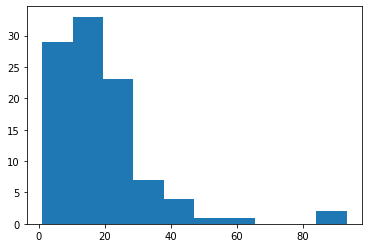

In [101]:
plt.hist(dist_all)

In [100]:
dist_all = dist_from_geo(y_pred, y_test)

In [80]:
class PipesFitting(object):
    def __init__(self, X, Y) -> None:
        self.X, self.Y = X, Y

        self.grid_num = int(np.sqrt(self.X.shape[0]))
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.X, self.Y, train_size=.75)
        # self.grid_lat, self.grid_lon = round(geodesic(self.Y[1, :], self.Y[1 + self.grid_num, :]).m, 2), \
        #     round(geodesic(self.Y[1, :], self.Y[2, :]).m, 2)


    def add_pipes(self, pipes, model_ls):
        self.pipes = pipes
        self.model_ls = model_ls

    def fit(self):
        self.y_test_pred_all = []
        self.y_train_pred_all = []
        self.dist_all = []
        self.model_all = []

        for pipe in self.pipes:
            pipe.fit(self.x_train, self.y_train)
            y_pred = pipe.predict(self.x_test)
            
            self.y_train_pred_all.append(pipe.predict(self.x_train))
            self.y_test_pred_all.append(y_pred)

            self.model_all.append(pipe)

            self.dist_all.append(self.e_dist(self.y_test, y_pred))

        # self.d_error = np.mean(self.dist_all, axis=1)
        # self.d_medians = np.around(np.median(self.dist_all, axis=1), 2)

    def dist_from_geo(self, geo1, geo2):
        return np.array([geodesic(i, j).m for i, j in zip(geo1, geo2)])

    def e_dist(self, d1, d2):
        return np.linalg.norm([d1, d2])

class VisualizeResult():
    def __init__(self, pipes) -> None:
        self.pipes = pipes

    def boxplot_pipes(self):
        box_plot = sns.boxplot(data=self.pipes.dist_all)
        plt.xticks(np.arange(len(self.pipes.model_ls)), self.pipes.model_ls)
        plt.ylabel('Error on test set (m)')

        for xtick in box_plot.get_xticks():
            box_plot.text(xtick, self.pipes.d_medians[xtick],self.pipes.d_medians[xtick], 
                    horizontalalignment='center',size='x-small',color='w',weight='semibold', c='k')

    def scatter_pipes(self):
        pipes = self.pipes
        n_row = len(pipes.model_ls)
        fig, axs = plt.subplots(n_row, 2, figsize=(n_row * 7, n_row * 5))
        # axs = axs.flatten()
        for ind, model in enumerate(pipes.model_ls):
            # y_tmp = model_all[ind].predict(x_train)
            y_train_pred = pipes.y_train_pred_all[ind]
            compare_pred(pipes.y_train, y_train_pred, axs[ind, 0])
            axs[ind, 0].set_title(f'{model}')
            axs[ind, 0].legend(ncol=2, bbox_to_anchor=(.75, -.15))


            y_test_pred = pipes.y_test_pred_all[ind]
            compare_pred(pipes.y_test, y_test_pred, axs[ind, 1])
            axs[ind, 1].set_title(f'Localization for {location}, Grid size {pipes.grid_lat, pipes.grid_lon}')
            plot_agent(RX, axs[ind, 1], label='Anchor')
            axs[ind, 1].legend(ncol=2, bbox_to_anchor=(.75, -.15))

    def scatter_pipe(self, ind):
        pipes = self.pipes
        y_train_pred = pipes.y_train_pred_all[ind]           
        y_test_pred = pipes.y_test_pred_all[ind]

        compare_pred(pipes.y_train, y_train_pred)
        plt.title(f'{pipes.model_ls[ind]}')
        plt.legend(ncol=2, bbox_to_anchor=(.75, -.15))
        
        plt.figure()
        compare_pred(pipes.y_test, y_test_pred)
        plt.title(f'Localization for {location}, Grid size {pipes.grid_lat, pipes.grid_lon}')
        plt.legend(ncol=2, bbox_to_anchor=(.75, -.15))

    def scatter_outliers(self):
        pipes = self.pipes
        for ind, model in enumerate(pipes.model_ls):
            ol = y_test[self.outlier_index(pipes.dist_all[ind])]
            plt.figure()
            plot_agent(ol)
            plot_agent(RX)
            plt.title(f'Outliers in {model}')

    def outlier_index(self, data):
        q3, q1 = np.percentile(data, [75, 25])
        high_bar = q3 + 1.5 * (q3 - q1)
        low_bar = q1 - 1.5 * (q3 - q1)
        return (data > high_bar) | (data < low_bar)

    def cdf_plot(self):
        pipes = self.pipes
        model_ls = pipes.model_ls

        x = np.arange(len(pipes.dist_all[0])) / (len(pipes.dist_all[0]) - 1)

        for ind, model in enumerate(pipes.model_ls):
            score = np.sort(pipes.dist_all[ind])
            plt.plot(score, x, label=f'{model}')

        plt.ylabel('CDF')
        plt.xlabel('Euclidean Distance error')
        plt.legend(loc='best')
        # plt.xscale('log')

In [81]:
pipes = [xgb_pipe, lgb_pipe, rf_pipe, dt_pipe]
model_ls = ['XGB', 'LGBM', 'RF', 'DT']

pipes_class = PipesFitting(X, Y)
pipes_class.add_pipes(pipes, model_ls)
pipes_class.fit()

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


AttributeError: 'PipesFitting' object has no attribute 'd_medians'

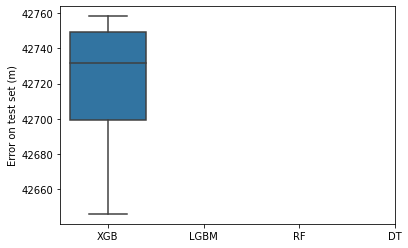

In [85]:
v = VisualizeResult(pipes_class)
v.boxplot_pipes()

## Transfer learning

In [24]:
paris_20 = 'paris_square_20'
meta_pr, cirs_pr, dist_pr, Y_all_pr, RX_all_pr, _, _ = read_mat(paris_20)

In [25]:
_ = rf_pipe.fit(x_train, y_train)

In [26]:
y_pred = rf_pipe.predict(x_test)

(400, 125)

In [28]:
ext_pr = Extractor(cirs_pr)

X_pr = ext_pr.amplitute_feature(5)

# X_pr = ext_pr.coord_feature()

d:\Telecom_2eme_anne\Geolocation_simulation\Simulation\tools.py:95: ComplexWarning: Casting complex values to real discards the imaginary part
  self.mag = - math.floor(math.log(np.mean(self.delay_set), 10))


In [44]:
pr_pred = rf_pipe.predict(X_pr)
tl_error = abs(pr_pred-dist_pr)

np.mean(tl_error)

38.614088325640815

Text(0.5, 0, 'index of BS')

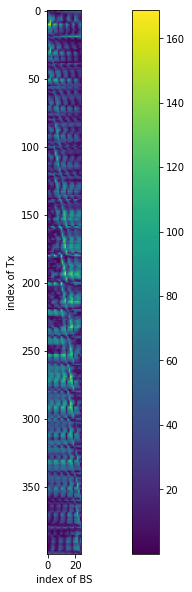

In [34]:
plt.figure(figsize=(18, 10))
plt.imshow(abs(rf_pipe.predict(X_pr)-dist_pr))
plt.colorbar()
plt.ylabel('index of Tx')
plt.xlabel('index of BS')

In [ ]:
rf_pipe.predict()

In [38]:
lgb_pipe.fit(y_train, tx_train)

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


Pipeline(steps=[('scale', StandardScaler()),
                ('lgb',
                 MultiOutputRegressor(estimator=LGBMRegressor(colsample_bytree=1,
                                                              eta=0.1,
                                                              max_depth=2000,
                                                              n_estimators=500,
                                                              reg_lambda=0,
                                                              subsample=1)))])

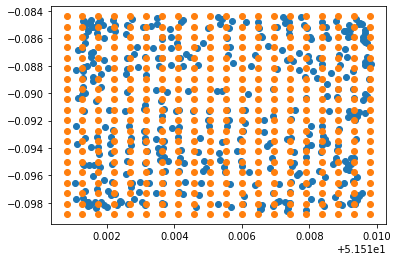

In [48]:
tl_tx = lgb_pipe.predict(pr_pred)
plot_agent(np.array(tl_tx))
# plot_agent(Y_all_pr)
plot_agent(TX)

In [198]:
tx_pred = lgb_pipe.predict(y_test)

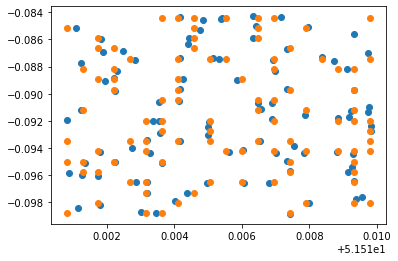

In [200]:
plot_agent(tx_pred)

plot_agent(tx_test)

Text(0.5, 0, 'index of BS')

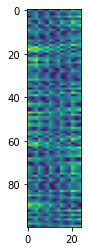

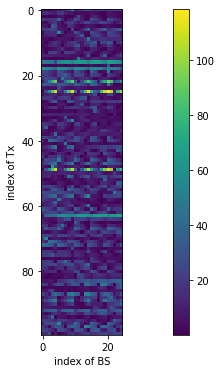

In [177]:
plt.imshow(y_test)
# plt.figure()
plt.imshow(y_pred)
plt.figure(figsize=(18,6))
plt.imshow(abs(y_test-y_pred))
plt.colorbar()
plt.ylabel('index of Tx')
plt.xlabel('index of BS')

In [100]:
from scipy.optimize import minimize

In [122]:
# Mean Square Error
# locations: [ (lat1, long1), ... ]
# distances: [ distance1, ... ]


def dist2coord(x, coords, dists):

    # mse = 0.0

    d = np.array([geodesic(x, coord).m for coord in coords])

    return np.linalg.norm([d, dists])

def dist_from_geo(geo1, geo2):
    return np.array([geodesic(i, j).m for i, j in zip(geo1, geo2)])


In [168]:
dist.shape, Y[0]

((400, 25), array([51.5108, -0.0988]))

In [171]:
geodesic(res.x, Y[0]).m

669.7393771482434

In [169]:
dist2coord(RX[0], RX, y_pred[0,:])

res = minimize(
    dist2coord,
    RX[0],
    args=(RX, dist[0]),
    method='L-BFGS-B',
    options={
        'ftol':1e-5,         # Tolerance
        'maxiter': 1e+7      # Maximum iterations
    }
)  

res.x

array([51.51505574, -0.09197685])

In [165]:
x_pred = []

for p in dist[0:100]:
    res = minimize(
    dist2coord,
    RX[0],
    args=(RX, p),
    method='L-BFGS-B',
    options={
        'ftol':1e-5,         # Tolerance
        'maxiter': 1e+7      # Maximum iterations
    }
)   
    print(res.x)
    x_pred.append(res.x)


[51.51505574 -0.09197685]
[51.51505731 -0.09197784]
[51.51505725 -0.09197799]
[51.51505719 -0.09197815]
[51.51505714 -0.09197832]
[51.51505712 -0.09197848]
[51.51505711 -0.09197861]
[51.51505711 -0.09197871]
[51.5150571  -0.09197877]
[51.5150571  -0.09197878]
[51.51505711 -0.09197876]
[51.51505711 -0.09197871]
[51.51505711 -0.09197861]
[51.51505712 -0.09197848]
[51.51505713 -0.09197832]
[51.51505718 -0.09197816]
[51.51505725 -0.091978  ]
[51.51505731 -0.09197784]
[51.51505572 -0.09197685]
[51.5150561 -0.0919769]
[51.51505731 -0.09197783]
[51.51505724 -0.09197801]
[51.51505716 -0.0919782 ]
[51.51505713 -0.09197842]
[51.51505711 -0.09197862]
[51.5150571 -0.0919788]
[51.5150571  -0.09197894]
[51.51505709 -0.09197903]
[51.51505709 -0.09197909]
[51.51505709 -0.09197911]
[51.51505709 -0.09197909]
[51.51505709 -0.09197904]
[51.5150571  -0.09197894]
[51.5150571 -0.0919788]
[51.51505711 -0.09197863]
[51.51505713 -0.09197843]
[51.51505716 -0.09197821]
[51.51505724 -0.09197803]
[51.51505731 -0.09

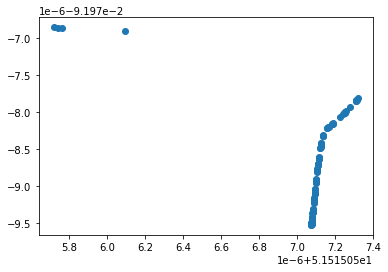

In [166]:
plot_agent(np.array(x_pred))

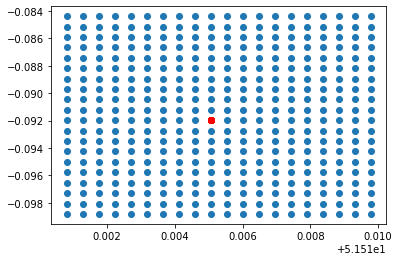

In [163]:


# plt.ylim([Y[:, 1].min(), Y[:, 1].max()])
# plt.xlim([Y[:, 0].min(), Y[:, 0].max()])
plot_agent(Y)
for i in x_pred:
    plt.scatter(i[0], i[1], color='r')

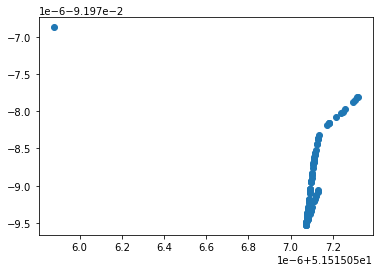

In [152]:
plot_agent( np.array(x_pred))

In [147]:
dist2coord(RX[0], RX, y_pred[0, :])

195.1272909394517

In [124]:
y_pred.shape, RX[0]

((100, 25), array([51.51127306, -0.09804188]))

In [142]:
res = minimize(
    dist2coord,
    RX[0],
    args=(RX, y_pred[0,:]),
    method='L-BFGS-B',
    options={
        'ftol':1e-1,         # Tolerance
        'maxiter': 1e+7      # Maximum iterations
    }

)

# initial_location: (lat, long)
# locations: [ (lat1, long1), ... ]
# distances: [ distance1,     ... ] 
# result = minimize(
#     mse,                         # The error function
#     initial_location,            # The initial guess
#     args=(locations, distances), # Additional parameters for mse
#     method='L-BFGS-B',           # The optimisation algorithm
#     options={
#         'ftol':1e-5,         # Tolerance
#         'maxiter': 1e+7      # Maximum iterations
#     })
# location = result.x

In [143]:
res.x

array([51.51549101, -0.09322279])

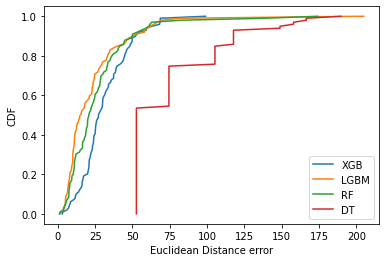

In [52]:
visual_pipes = VisualizeResult(pipes_class)
visual_pipes.cdf_plot()

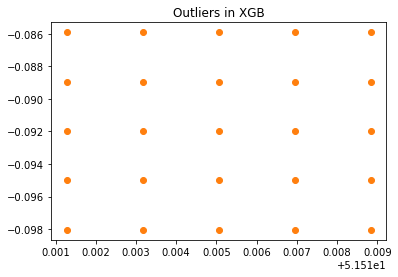

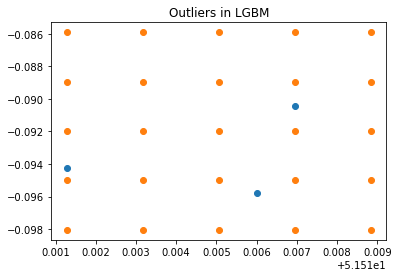

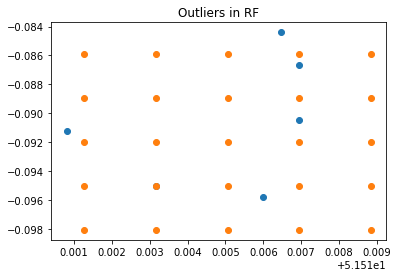

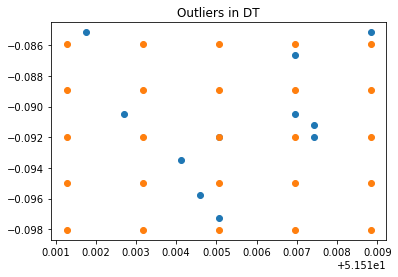

In [ ]:
visual_pipes.scatter_outliers()

Text(0, 0.5, 'Latitude')

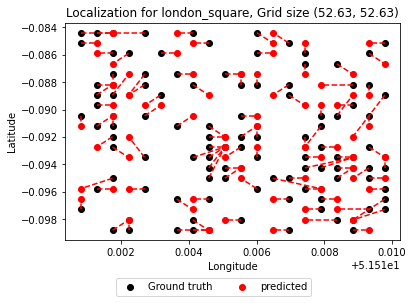

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y_test[:, 0], y_test[:, 1], color='k', label='Ground truth')
ax.plot([y_test.T[0, :], y_pred.T[0, :]], [y_test.T[1, :], y_pred.T[1, :]], '--', c='r')
ax.scatter(y_pred[:, 0], y_pred[:,1], color='r', label='predicted')
ax.set_title(f'Localization for {location}, Grid size {grid_lat, grid_lon}')
# ax.legend(loc='best')
ax.legend(ncol=2, bbox_to_anchor=(.75, -.15))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

## Feature Engineering

## Train lon and lat separately

In [35]:
xgb_pipe_lat = Pipeline([('scale', StandardScaler()), \
    ('xgb_lat', xgb.XGBRegressor(n_estimators=100, max_depth=1000, eta=0.1, subsample=1, colsample_bytree=1, reg_lambda=0))])
xgb_pipe_lon = Pipeline([('scale', StandardScaler()), \
    ('xgb_lon', xgb.XGBRegressor(n_estimators=100, max_depth=1000, eta=0.1, subsample=1, colsample_bytree=1, reg_lambda=0))])

lgb_pipe_lat = Pipeline([('scale', StandardScaler()), \
    ('lgb_lat', lgb.LGBMRegressor(n_estimators=100, max_depth=1000, eta=0.1, subsample=1, colsample_bytree=1, reg_lambda=0))])
lgb_pipe_lon = Pipeline([('scale', StandardScaler()), \
    ('lgb_lon', lgb.LGBMRegressor(n_estimators=100, max_depth=1000, eta=0.1, subsample=1, colsample_bytree=1, reg_lambda=0))])


rf_pipe_lat = Pipeline([('scale', StandardScaler()), ('rf_lat', RF(max_depth=1000))])
rf_pipe_lon = Pipeline([('scale', StandardScaler()), ('rf_lon', RF(max_depth=1000))])

dt_pipe_lat = Pipeline([('scale', StandardScaler()), ('dt_lat', DT())])
dt_pipe_lon = Pipeline([('scale', StandardScaler()), ('dt_lon', DT())])

NameError: name 'x_train' is not defined

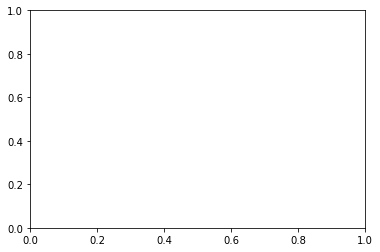

In [36]:
pipes_lat = [xgb_pipe_lat, lgb_pipe_lat, rf_pipe_lat, dt_pipe_lat]
pipes_lon = [xgb_pipe_lon, lgb_pipe_lon, rf_pipe_lon, dt_pipe_lon]

dist_1d = []
model_1d = []

fig, axs = plt.subplots()
for pipe_lat, pipe_lon in zip(pipes_lat, pipes_lon):
    pipe_lat.fit(x_train, y_train_lat)
    pipe_lon.fit(x_train, y_train_lon)
    model_1d.append(pipe)
    y_pred_lat = pipe_lat.predict(x_test)
    y_pred_lon = pipe_lon.predict(x_test)
    y_pred_coord = np.vstack([y_pred_lat, y_pred_lon]).T
    dist = dist_from_geo(y_pred_coord, y_test) # distance from prediction to true value

    dist_1d.append(dist)
    y_pred_all.append(y_pred)

mean_1d = np.mean(dist_1d, axis=1)

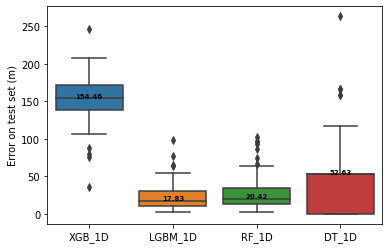

In [ ]:
medians_1d = np.around(np.median(dist_1d, axis=1), 2)

box_1d = sns.boxplot(data=dist_1d)
plt.xticks([0, 1, 2, 3], ['XGB_1D', 'LGBM_1D', 'RF_1D', 'DT_1D'])
plt.ylabel('Error on test set (m)')

for xtick in box_1d.get_xticks():
    box_1d.text(xtick, medians_1d[xtick],medians_1d[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold', c='k')

## Performance Analysis

In [ ]:
df_model = pd.DataFrame()


for i in range(len(dist_all)):
    df_model[model_ls[i]] = dist_all[i]
    # df_model[model_ls[i]+'_1D'] = dist_1d[i]

# medians_all = np.vstack([medians, medians_1d]).T.flatten()
medians_all = medians

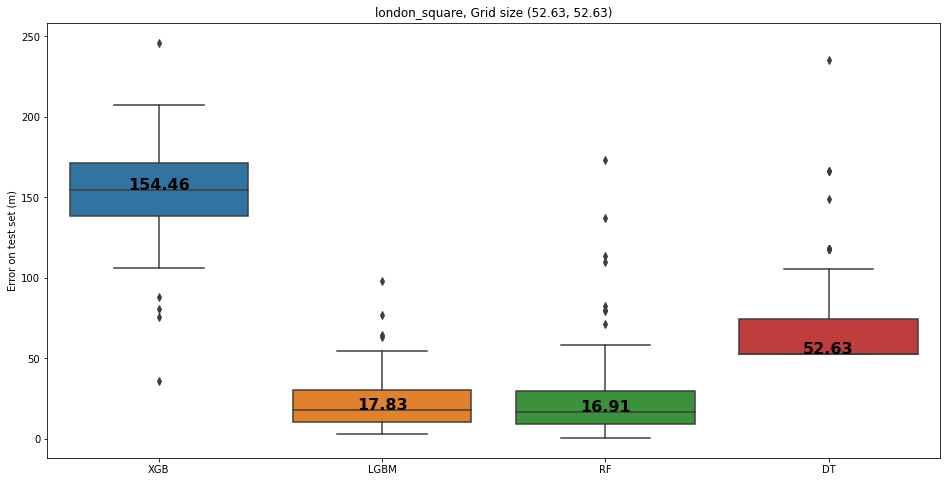

In [ ]:
_ = plt.figure(figsize=(16,8))
box_all = sns.boxplot(data=df_model)

plt.ylabel('Error on test set (m)')
plt.title(f'{location}, Grid size {grid_lat, grid_lon}')

for xtick in box_all.get_xticks():
    box_all.text(xtick, medians_all[xtick], medians_all[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold', c='k', fontsize=16)

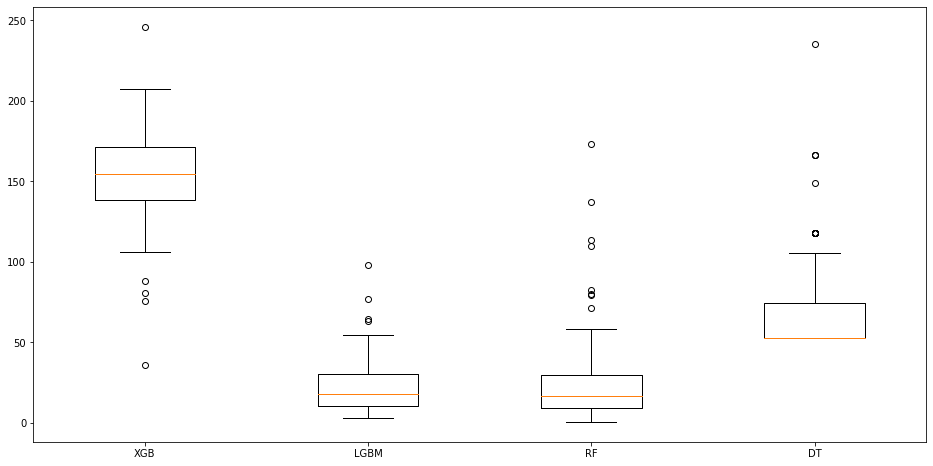

In [ ]:
plt.figure(figsize=(16,8))
r = boxplot(df_model.T, labels=df_model.columns, meanline=True)

## Outlier locating

In [ ]:
def outlier_index(data):
    q3, q1 = np.percentile(data, [75, 25])
    high_bar = q3 + 1.5 * (q3 - q1)
    low_bar = q1 - 1.5 * (q3 - q1)
    return (data > high_bar) | (data < low_bar)

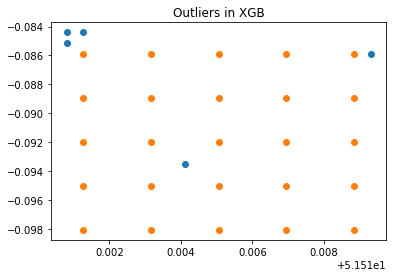

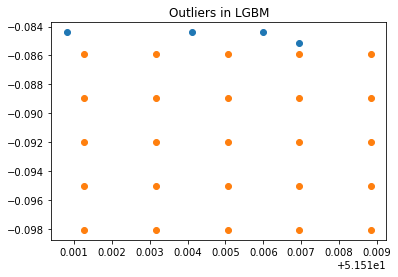

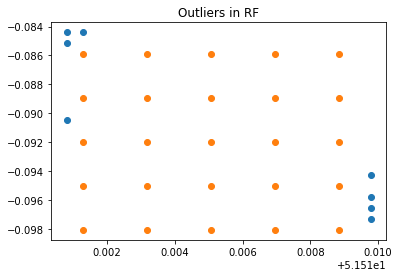

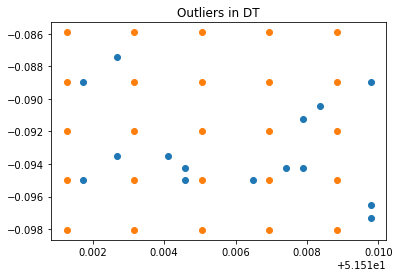

In [ ]:
for model in model_ls:
    data = df_model[model]

    ol = y_test[outlier_index(data)]
    plt.figure()
    plot_agent(ol)
    plot_agent(RX)
    plt.title(f'Outliers in {model}')

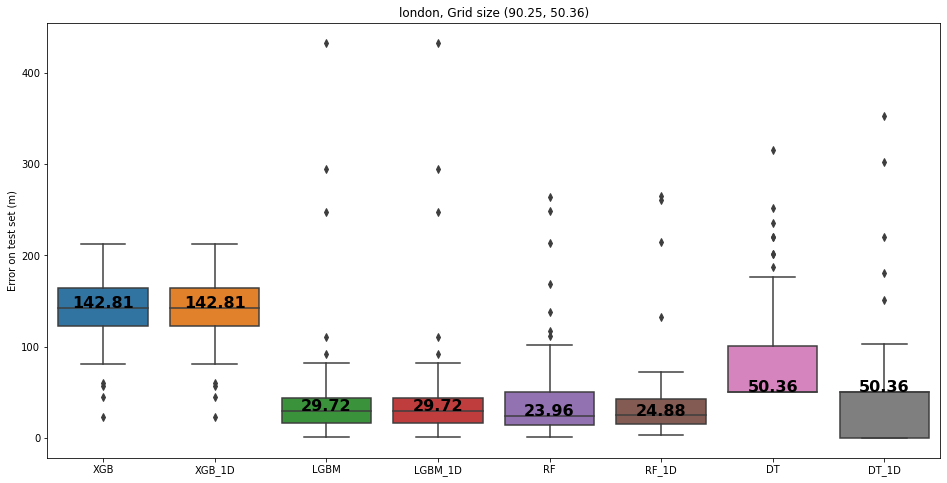

In [ ]:
_ = plt.figure(figsize=(16,8))
box_all = sns.boxplot(data=df_model)

plt.ylabel('Error on test set (m)')
plt.title(f'{location}, Grid size {grid_lat, grid_lon}')

for xtick in box_all.get_xticks():
    box_all.text(xtick, medians_all[xtick], medians_all[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold', c='k', fontsize=16)

# Statistical learning

In [ ]:
import scipy.stats as stats
from scipy.special import erf 
from math import isclose

In [ ]:
def Q(x):
    '''Gaussian Q function'''
    return .5 - .5  * erf(x / np.sqrt(2))

In [ ]:
global p_NL, p_E, eta, theta_max
p_NL = .5 # probability of all delays are from NLOS path
P_E = .5 # weights of NL,E in NL,E and NL,M sources
eta = 1e6 # parameter for exponential distribution of NL,M, depending on channel
theta_max = max(delay_set)

def p_ai(a_i, L):
    if a_i == 0:
        return p_NL
    elif a_i > 0 and a_i <= L:
        return (1 - p_NL) / L
    else:
        return 0

def f_L(theta, p_a, p_i):
    return 1 if isclose(theta, geodesic(p_a, p_i).m / 3e8, rel_tol=.05) else 0

def f_NL(theta, p_a, p_i):
    theta_min = geodesic(p_a, p_i).m / 3e8
    theta_max = max(delay_set) # predefined maximum possible delay
    print(f_NLE(theta, theta_max), f_NLM(theta, theta_min, theta_max))
    return P_E * f_NLE(theta, theta_max) + (1 - P_E) * f_NLM(theta, theta_min, theta_max)

def f_NLM(theta, theta_min, theta_max):
    return eta * np.exp(-eta * (theta - theta_min)) / (1 - np.exp(-eta * (theta_max - theta_min))) \
        if theta >= theta_min and theta < theta_max \
            else 0

def f_NLE(theta, theta_max):
    return 1 / theta_max if theta >= 0 and theta < theta_max else 0

def f_anchor_i_ai(theta_arr, p_a, p_i, a_i):
    '''conditional prob of anchor i given p_a, p_i, a_i 
    theta_arr reprents the entire theta arr in CIR for anchor i'''
    return np.prod([f_NL(theta, p_a, p_i) for theta in theta_arr]) if a_i == 0 \
        else f_L(theta_arr[a_i]) * np.prod([f_NL(theta, p_a, p_i) for theta in theta_arr if theta != theta_arr[a_i]])

def f_anchor_i(theta_arr, p_a, p_i):
    # conditional prob of anchor i given p_a, p_i
    L = len(theta_arr)
    # LOS term
    los_term = 0
    for a_i in range(L):
        los_term += f_L(theta_arr[a_i], p_a, p_i) * \
            np.prod([f_NL(theta, p_a, p_i) for theta in theta_arr if theta != theta_arr[a_i]])
        # if f_L(theta_arr[a_i], p_a, p_i) == 1:
        #     print('los term is', los_term, np.prod([f_NL(theta, p_a, p_i) for theta in theta_arr if theta != theta_arr[a_i]]))
    return p_NL * np.prod([f_NL(theta, p_a, p_i) for theta in theta_arr]) + \
        (1 - p_NL) / L * los_term

def f_anchor(theta_mtx, p_a, p_i_arr):
    # theta_mtx shape: N * L - num of stations by num of ray traces per station
    return np.prod([f_anchor_i(theta_mtx[i], p_a, p_i_arr[i]) for i in range(len(theta_mtx))])

def m_L(p_a, p_i, tau, sigma):
    return stats.norm(tau, sigma).pdf(geodesic(p_a, p_i).m / 3e8)

def m_NL(theta_min, theta_max, tau, sigma):
    return P_E / theta_max * ( Q(-tau/sigma)- Q((theta_max - tau)/sigma) ) + \
            (1 - P_E) * eta * np.exp(eta * theta_min - eta * tau + .5 * eta**2 * sigma**2) * \
                (Q((theta_min - tau + eta*sigma**2) / sigma) - Q((theta_max - tau + eta*sigma**2) / sigma))

def m_i(p_a, p_i, theta_max, tau_arr, sigma_arr):
    '''
    message update for anchor i
    '''
    L = len(tau_arr)
    theta_min = geodesic(p_a, p_i).m / 3e8
    # LOS term
    los_term = 0
    for a_i in range(L):
        los_term += m_L(p_a, p_i, tau_arr[a_i], sigma_arr[a_i]) * \
            np.product([m_NL(theta_min, theta_max, tau_arr[j], sigma_arr[j]) for j in range(0, L) if j != a_i])
    
    return p_NL * np.prod([m_NL(theta_min, theta_max, tau, sigma) for tau, sigma in zip(tau_arr, sigma_arr)]) + \
        (1 - p_NL) / L * los_term


def f_pa(f_p, p_a, p_i_arr, theta_max, tau_mtx, sigma_mtx):
    return f_p * np.product([m_i(p_a, p_i, theta_max, tau_arr, sigma_arr) \
        for p_i, tau_arr, sigma_arr in zip(p_i_arr, tau_mtx, sigma_mtx)])
    ...

def g(p_a, p_i_arr, tau_mtx, sigma_mtx):
    '''
    Gaussian mixture rings of one agent
    '''
    N = len(p_i_arr)

    def g_i(p_a, p_i, tau_arr, sigma_arr):
        '''
        Gaussian mixture rings
        '''
        L = len(tau_arr)

        return 1 / L * np.sum([m_L(p_a, p_i, tau,  sigma) for tau, sigma in zip(tau_arr, sigma_arr)])

    return np.sum([g_i(p_a, p_i, tau_arr, sigma_arr) for p_i, tau_arr, sigma_arr in zip(p_i_arr, tau_mtx, sigma_mtx)])

## Sampling agents

In [ ]:
class AgentSampling(object):
    def __init__(self,circle=360, S=1000):
        self.circle = circle
        self.S = S

    def sampling(self, p_a, p_i_arr, tau, sigma):
        
        self.p_a = p_a
        self.tau = tau
        self.sigma = sigma
        self.p_i_arr = p_i_arr

        p_a_s = []
        weight = []
        N = len(self.p_i_arr)

        for s in range(self.S):
            i = np.random.choice(N) # sample over stations
            j = np.random.choice(len(self.tau[i])) # sample over traces between anchor and agent

            deg = np.random.choice(self.circle)
            p_i = self.p_i_arr[i]

            origin = point.Point(p_i)
            
            tmp = np.random.normal(self.tau[i][j], self.sigma[i][j])
            d = tmp * 3e8

            f_p = stats.norm(self.tau[i][j], self.sigma[i][j].T).pdf(tmp)
            
            p_s_loc = geodesic(d/1000).destination(origin, deg)
            p_s = np.array([p_s_loc.latitude, p_s_loc.longitude])
            fpa = f_pa(f_p, p_s, self.p_i_arr, theta_max, self.tau, self.sigma)
            ga = g(p_s, self.p_i_arr, self.tau, self.sigma)

            weight.append(np.abs(fpa / ga))
            p_a_s.append(p_s)

        self.p_a_s = np.array(p_a_s)
        self.weight = np.array(weight) / np.sum(weight)
        self.p_estim = np.multiply(self.weight, self.p_a_s.T).sum(axis=1)
        self.error = geodesic(self.p_a, self.p_estim)
        # self.p_estim = self.p_a_s.mean(axis=0)


    def visualize(self, ax):
        ax.scatter(self.p_a_s[:, 0], self.p_a_s[:, 1], c=self.weight, marker='o')
        ax.scatter(self.p_i_arr[:, 0], self.p_i_arr[:, 1])
        ax.scatter(self.p_a[0], self.p_a[1], s=320, marker='*')
        ax.set_title(f'distance error {self.error} m')
        ax.scatter(self.p_estim[0], self.p_estim[1], s=350, marker='x', color='r')
        # plot_agent(self.p_a_s)
        # plot_agent(self.p_i_arr)
        # plot_agent(self.p_a)

100%|██████████| 25/25 [06:52<00:00, 16.51s/it]


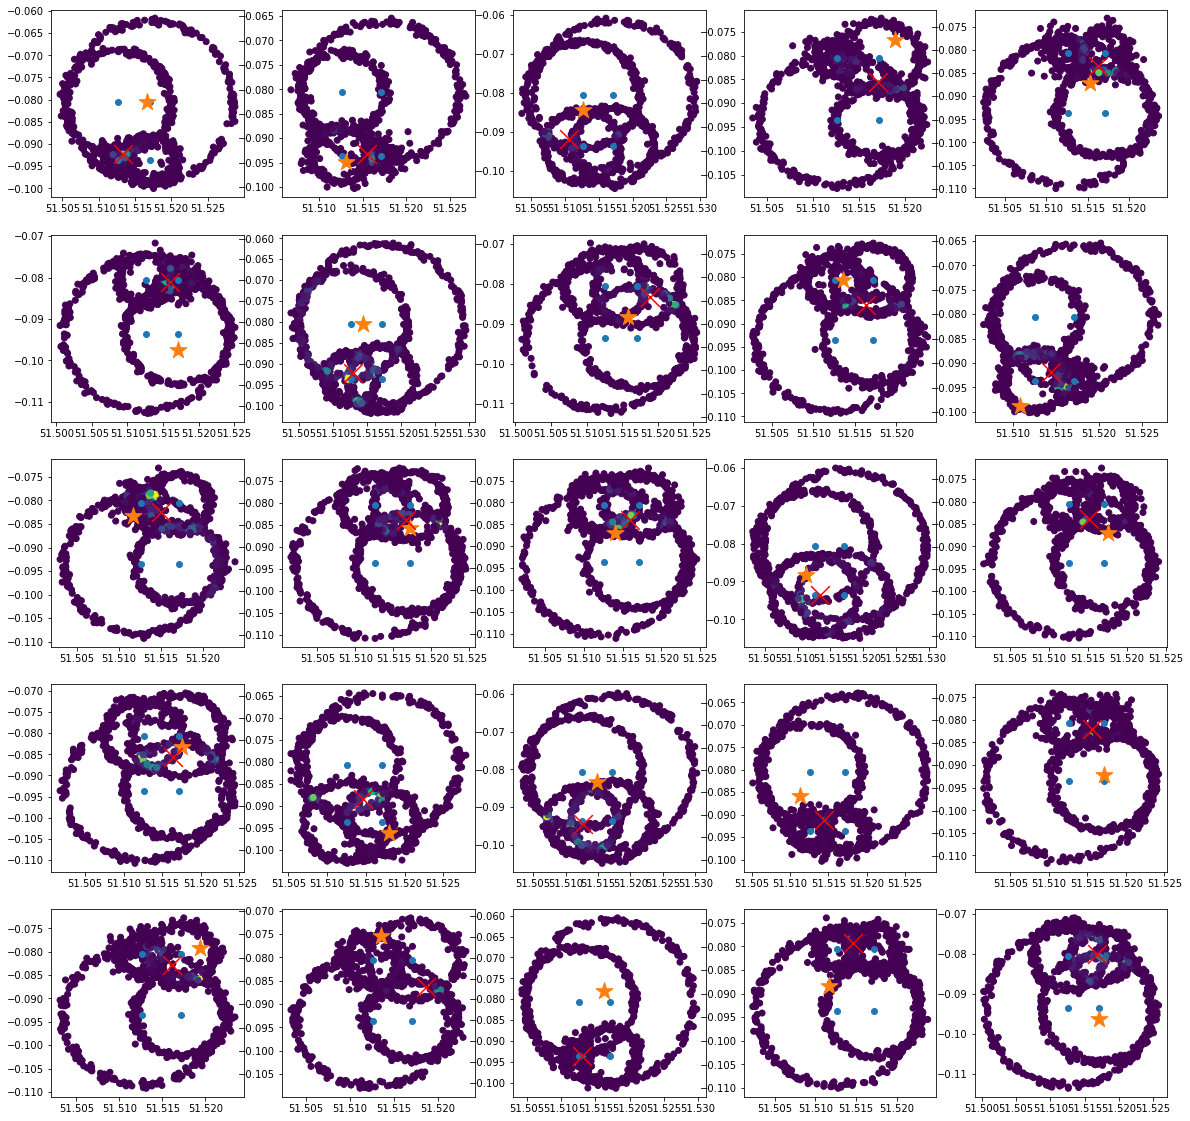

In [ ]:
n_a = 25
idx = np.random.choice(len(p_a_arr), n_a)
p_a_set = p_a_arr[idx]
fig, axs = plt.subplots(int(np.sqrt(n_a)), int(np.sqrt(n_a)), figsize=(20, 20))
axs = axs.flatten()
for k in tqdm(range(len(p_a_set))):
    p_a = p_a_set[k]
    agentsampling = AgentSampling(S=1000)
    agentsampling.sampling(p_a, p_i_arr, theta_mtx[idx[k]], sigma_mtx[idx[k]])
    agentsampling.visualize(axs[k])

100%|██████████| 25/25 [03:42<00:00,  8.91s/it]


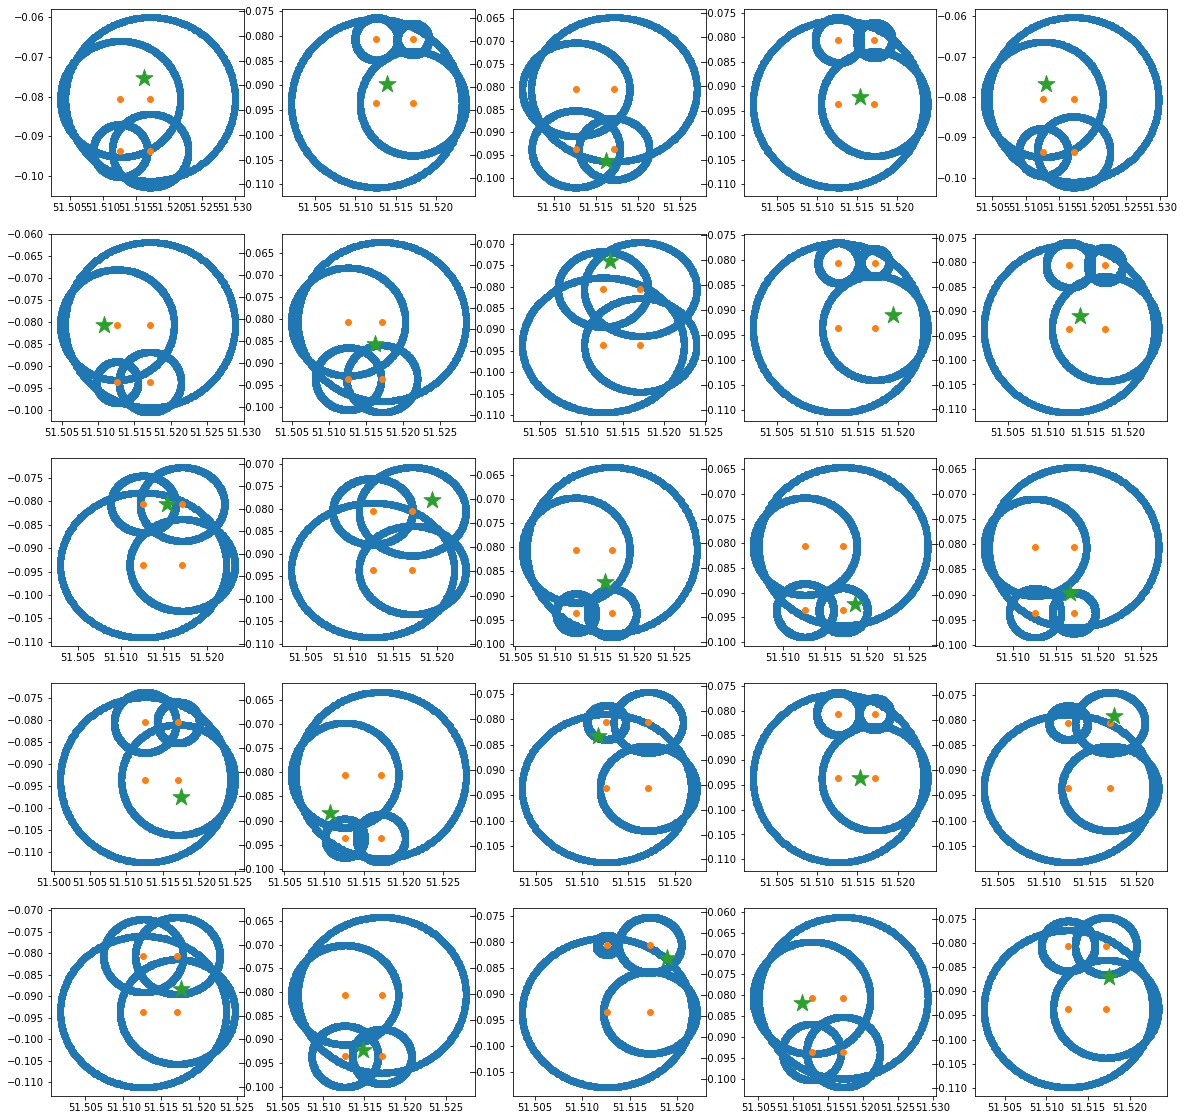

In [ ]:
n_a = 25
idx = np.random.choice(len(p_a_arr), n_a)
p_a_set = p_a_arr[idx]
fig, axs = plt.subplots(int(np.sqrt(n_a)), int(np.sqrt(n_a)), figsize=(20, 20))
axs = axs.flatten()
for k in tqdm(range(len(p_a_set))):
    p_a = p_a_set[k]
    agentsampling = AgentSampling(S=10000)
    agentsampling.sampling(p_a, p_i_arr, theta_mtx[idx[k]], sigma_mtx[idx[k]])
    agentsampling.visualize(axs[k])

## Unit test

In [ ]:
# example 1
n = np.random.choice(len(p_a_arr))
p_a = p_a_arr[n]
N = len(p_i_arr)
tau_m = theta_mtx[n]
sigma_m = sigma_mtx[n]
circle = 360 

S = 10**3 # number of samples
p_a_s = []
weight = []
for s in tqdm(range(S)):
    i = np.random.choice(N)
    j = np.random.choice(len(tau_m[i]))
    deg = np.random.choice(circle)
    p_i = p_i_arr[i]

    origin = point.Point(p_i)
    tau, sigma = tau_m[i][j], sigma_m[i][j]
    tmp = np.random.normal(tau, sigma)
    
    d = tmp * 3e8
    
    p_s = geodesic(d/1000).destination(origin, deg)
    f_p = stats.norm.pdf(tmp, tau, sigma)
    fpa = f_pa(f_p, p_s, p_i_arr, theta_max, tau_m, sigma_m)
    ga = g(p_s, p_i_arr, tau_m, sigma_m)

    weight.append(fpa / ga)

    p_a_s.append([p_s.latitude, p_s.longitude])

100%|██████████| 1000/1000 [00:18<00:00, 53.26it/s]


In [ ]:
w = weight / np.sum(weight)
es = np.multiply(w, p.T).sum(axis=1)

In [ ]:
p = np.array(p_a_s)

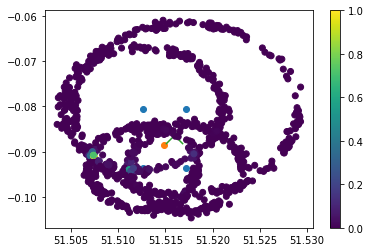

In [ ]:
# plot_agent(np.array(p_a_s))
plot_agent(p_i_arr)
plot_agent(p_a)
sc = plt.scatter(es[0], es[1], s=300, marker='x')
plt.scatter(p[:, 0], p[:, 1], c=np.abs(w))
plt.colorbar(sc)

In [ ]:
def f_t(theta, theta_min, theta_max):
    return eta * np.exp(-eta * (theta - theta_min) ) / (1 - np.exp(-eta * (theta_max - theta_min))) \
        if theta >= theta_min and theta < theta_max \
            else 0

eta=10**6.5
theta_min = geodesic(p_a, p_i).m / 3e8# 0.5 / 3e8
theta_max = max(delay_set)
# theta_max = 15 / 3e8
theta = theta_mtx[0, 0]
f_t(theta[0], theta_min, theta_max)

0

d:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


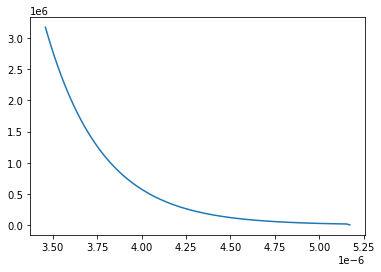

In [ ]:
l = []
# eta=1e9
for i in np.linspace(theta_min, theta_max, 100):
    l.append(f_t(i, theta_min, theta_max))

plt.plot(np.linspace(theta_min, theta_max, 100), l)

d:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


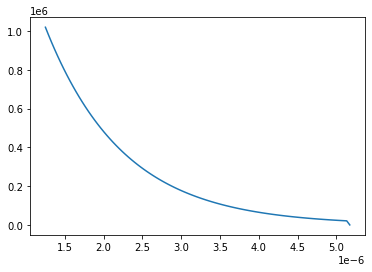

In [ ]:
l = []
# eta=1e9
for i in np.linspace(theta_min, theta_max, 100):
    l.append(f_t(i, theta_min, theta_max))

plt.plot(np.linspace(theta_min, theta_max, 100), l)

d:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


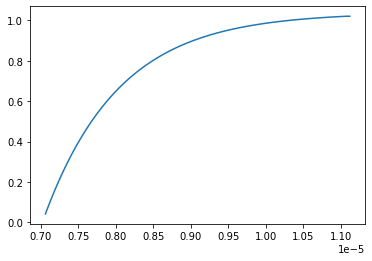

In [ ]:
ind = np.linspace(theta_min, theta_max, 100)
np.array(l).shape, ind.shape
new = np.array(l) * (ind[2]-ind[1])
plt.plot(ind, np.cumsum(new))